### 머신러닝 모델 구축을 위한 과정
1. 문제정의
- 주어진 데이터로 어떤 문제를 해결하려고 하는가?
    - 분류인지, 회귀인지
2. 데이터 특성의 칼럼이 의미하는 바를 알아야 함.
- 각 칼럼의 의미

3. 데이터 전처리
- 결측치
- 이상치
- 데이터 분포도 - 시각화
- 상관관계 어떤가? -> 히트맵을 시각화해서 중요 피쳐값을 선택

4. 데이터 특성 선택
- x, y 선택

5. 데이터 분할

6. 모델 선택
- 근거도 제시해주면 좋을 듯

7. 모델 훈련
- 훈련 방법 선택
-교차 검증할지

8. 모델 평가
- 분류, 회귀 평가방법

9. 모델 튜닝
- 그리드 서치
- automl
- 보탱, 스태킹 등등 선택

10. 결과 해석 및 시각화
- 모델 예측 결과를 해석방법
- 이 결과를 바탕으로 해볼만한 컨텐츠 제시

In [1]:
# 회귀 모델
# 필요 모듈 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing

In [2]:
california = fetch_california_housing()
data = pd.DataFrame(data=california.data, columns=california.feature_names)

In [3]:
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [4]:
data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [5]:
data.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

1. MedInc : 블록 그룹내 중위소득
2. HouseAge : 주택 연식
3. AveRooms : 평균 방 개수
4. AveBedrms : 평균 침실 개수
5. Population : 인구수
6. AveOccup : 평균 거주자 수
7. Latitude : 위도
8. Longitude : 경도
9. MedHouseVal: 주택가격

In [6]:
california.target_names

['MedHouseVal']

In [7]:
data['MedHouseVal'[0]]=california.target

In [8]:
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,M
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


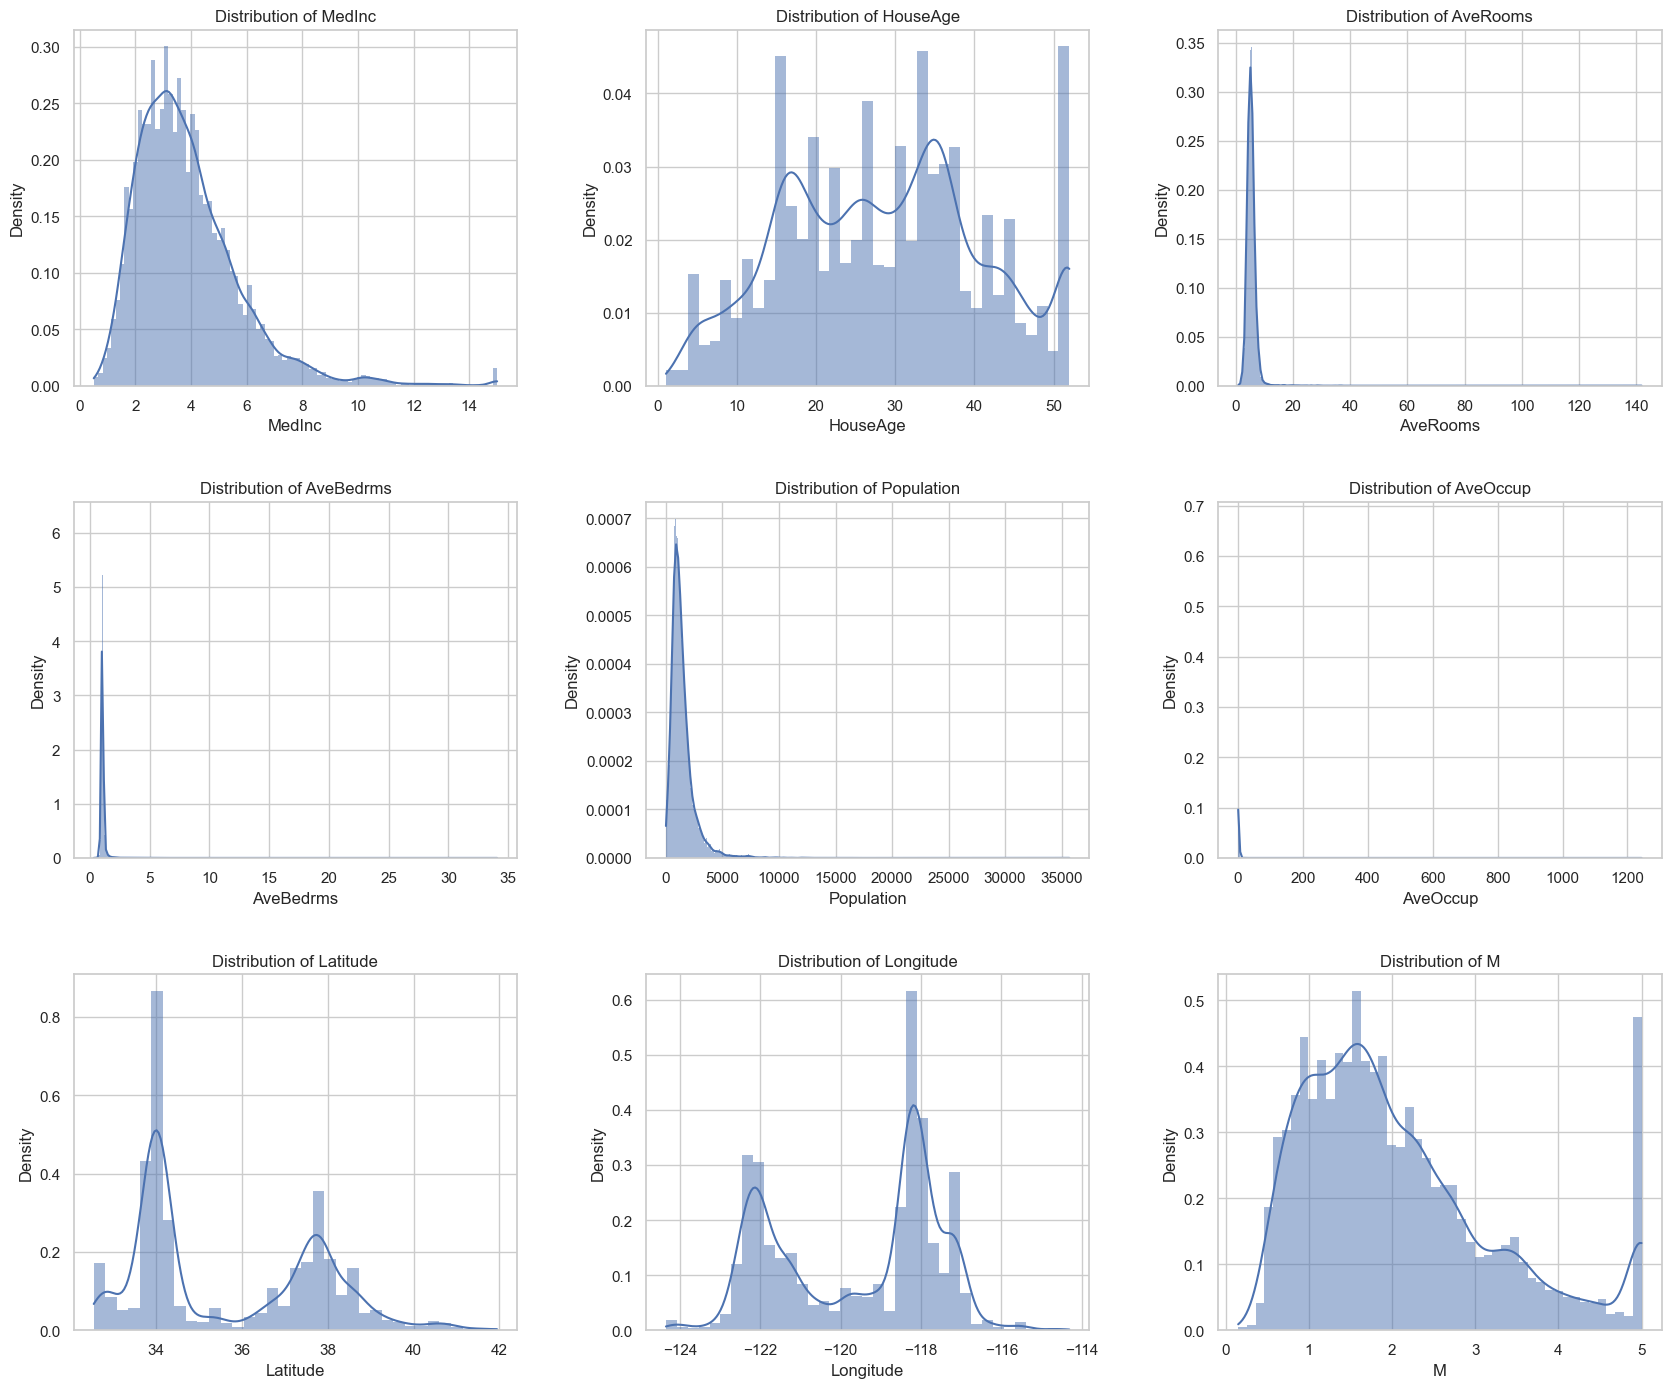

In [9]:
# 1. subplots 를 이용한 각 차트 시각화

# 각 변수의 분포 시각화
sns.set_theme(style="whitegrid") # 테마 설정해보기

# axes 를 통해서 각 차트를 지정하여 설정 가능
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 15))

# 서브플롯 간의 간격을 설정하여 겹치지 않도록 조정
fig.tight_layout(pad=5.0)

for i, column in enumerate(data.columns):
    ax = axes[i//3, i%3] # 현재 열의 서브플롯 위치 계산
    sns.histplot(data[column], kde=True, stat="density", linewidth=0, ax=ax) # 커널 밀도 추정 : kde 추가
    ax.set_title(f'Distribution of {column}')

plt.show()

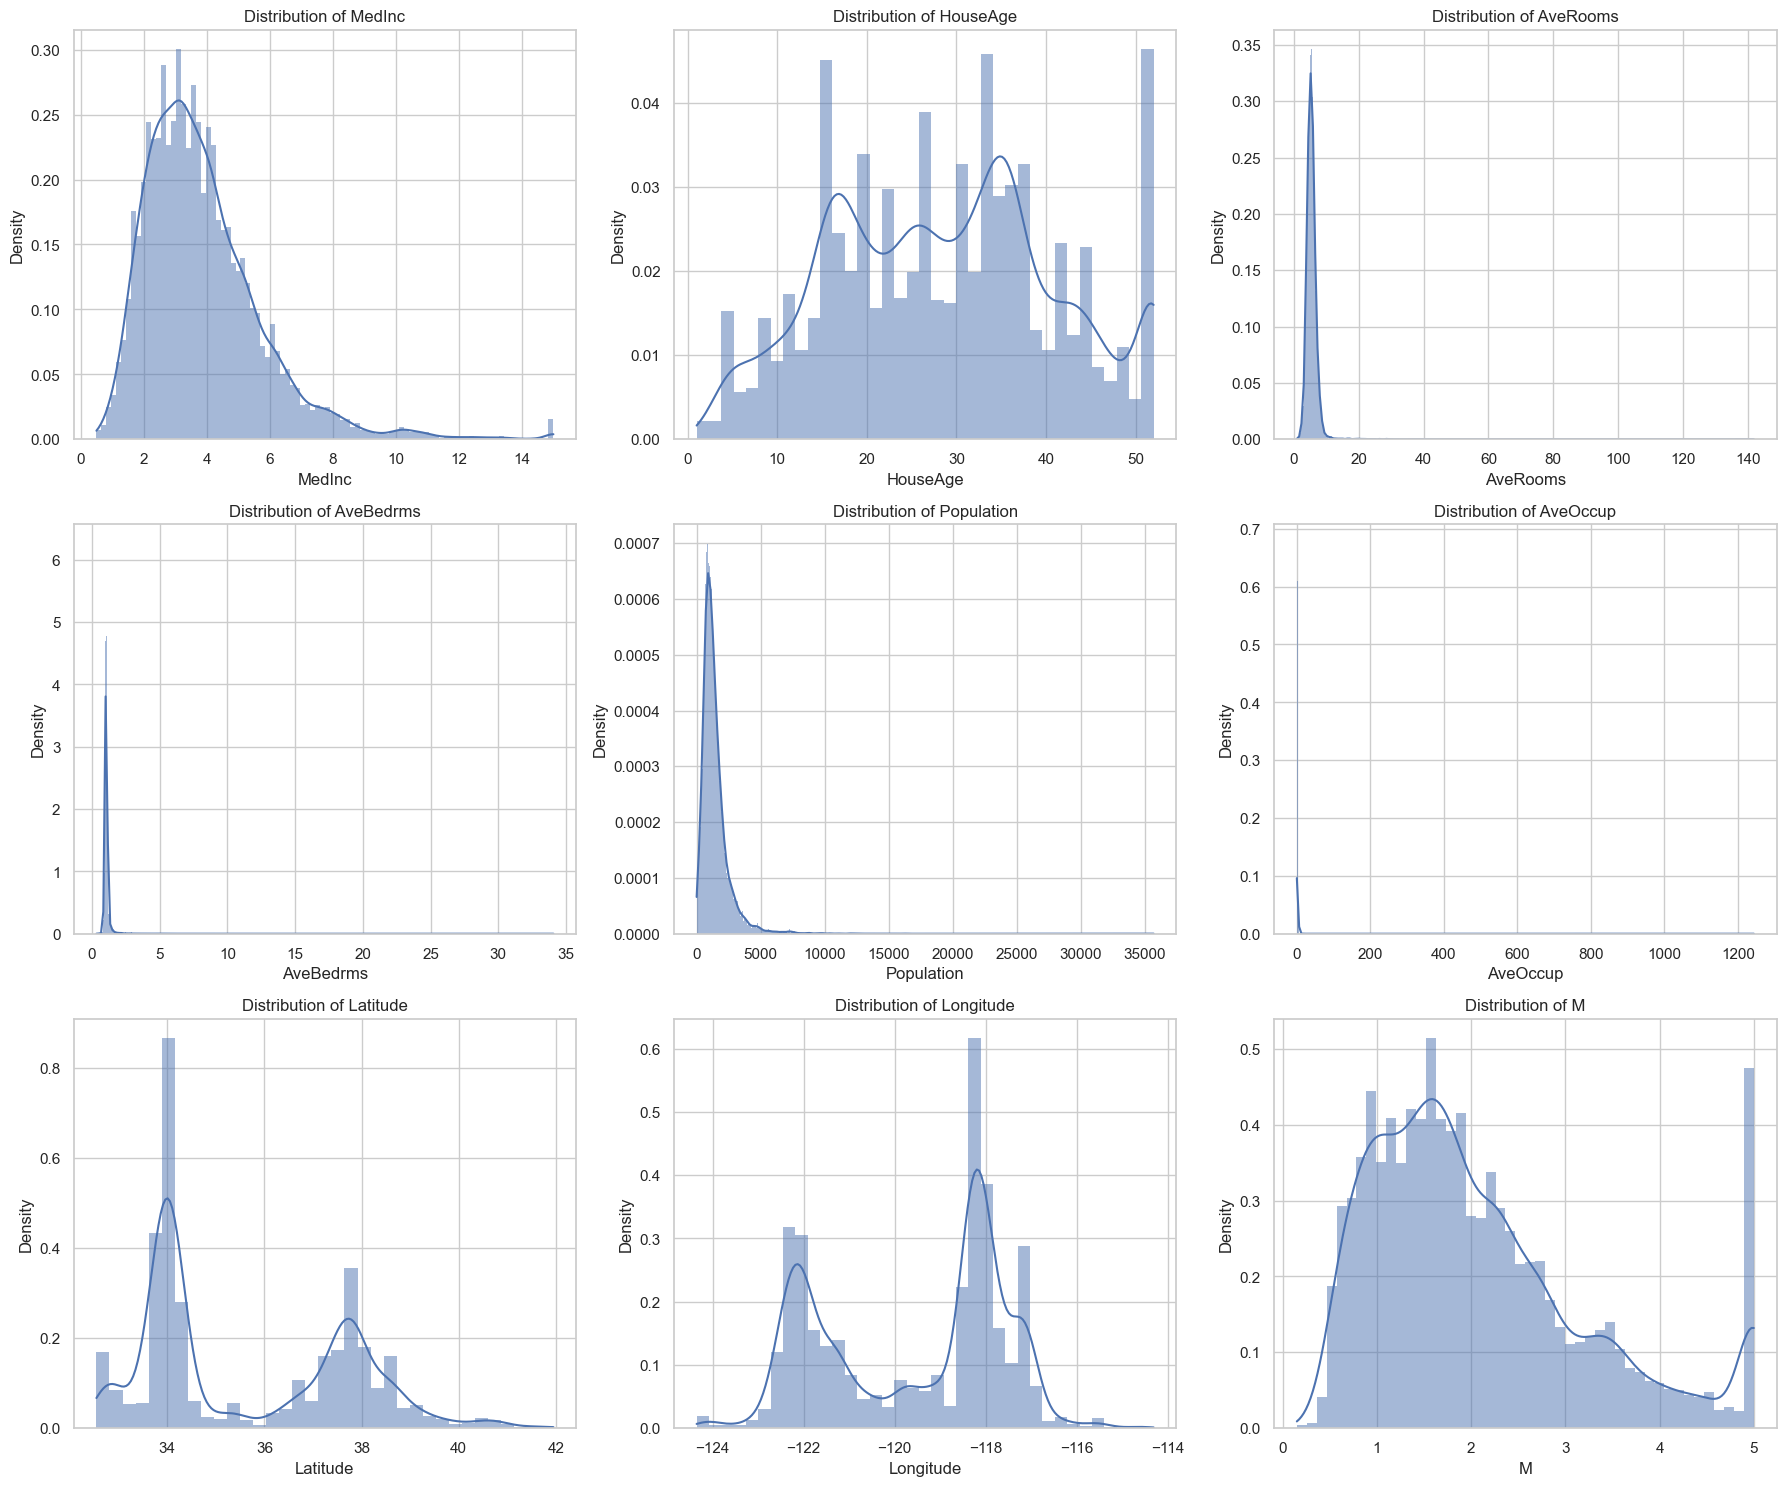

In [10]:
# 2. subplot 을 이용한 각 차트 시각화
plt.figure(figsize=(18, 15))
for i, column in enumerate(data.columns):
    plt.subplot(3, 3, i + 1)
    sns.histplot(data[column], kde=True, stat="density", linewidth=0)
    plt.title(f'Distribution of {column}')

plt.tight_layout(pad=1.0)
plt.show()

In [11]:
# 3. 상관관계 시각화
correlation_matrix = data.corr().round(2)
correlation_matrix

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,M
MedInc,1.00,-0.12,0.33,-0.06,0.00,0.02,-0.08,-0.02,0.69
HouseAge,-0.12,1.00,-0.15,-0.08,-0.30,0.01,0.01,-0.11,0.11
AveRooms,0.33,-0.15,1.00,0.85,-0.07,-0.00,0.11,-0.03,0.15
AveBedrms,-0.06,-0.08,0.85,1.00,-0.07,-0.01,0.07,0.01,-0.05
Population,0.00,-0.30,-0.07,-0.07,1.00,0.07,-0.11,0.10,-0.02
AveOccup,0.02,0.01,-0.00,-0.01,0.07,1.00,0.00,0.00,-0.02
Latitude,-0.08,0.01,0.11,0.07,-0.11,0.00,1.00,-0.92,-0.14
Longitude,-0.02,-0.11,-0.03,0.01,0.10,0.00,-0.92,1.00,-0.05
M,0.69,0.11,0.15,-0.05,-0.02,-0.02,-0.14,-0.05,1.00


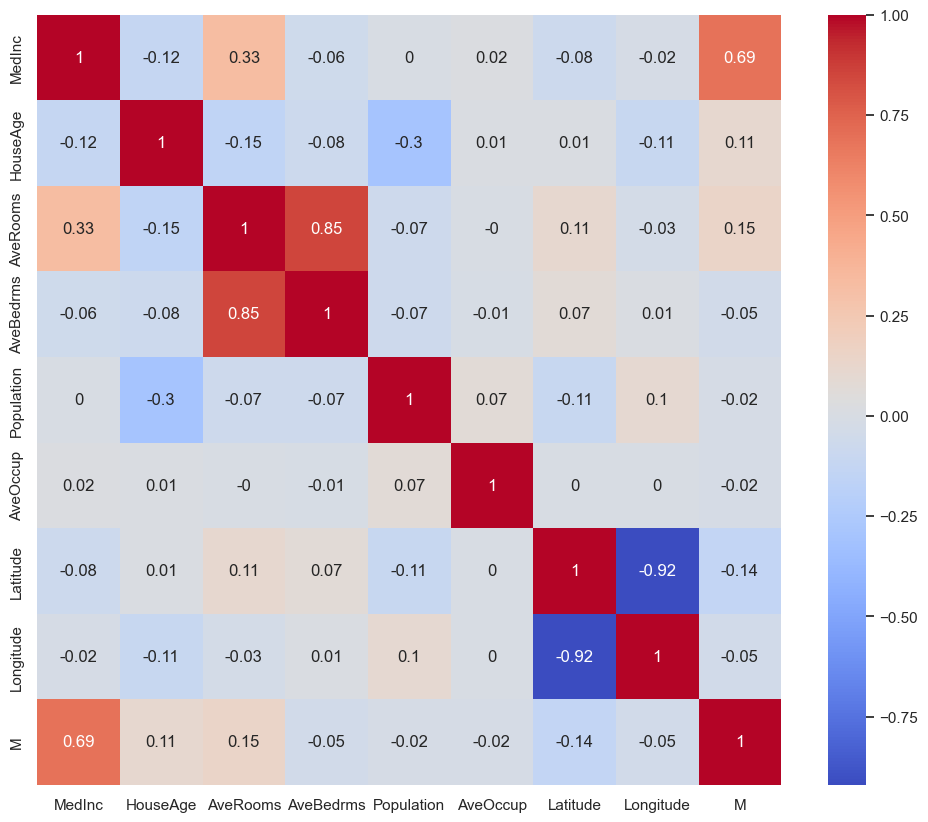

In [12]:
plt.figure(figsize=(12, 10))
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [13]:
from sklearn.model_selection import train_test_split

# 데이터 전처리
X = data.drop("MedHouseVal", axis=1)
y = data['MedHouseVal']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

KeyError: "['MedHouseVal'] not found in axis"

In [ ]:
# 학습
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 모델 선택
lr = LinearRegression()
lr.fit(X_train, y_train)

In [ ]:
# 예측하기
pred = lr.predict(X_test)

# 모델평가하기
mse = mean_squared_error(y_test, pred)
r2 = r2_score(y_test, pred)

print('mse 값은: ', mse)
print('r2 스코어 값은: ', r2)